In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
train.shape  # 2051 rows and 81 columns 

(2051, 81)

In [4]:
pd.options.display.max_columns = 100

In [5]:
display(train)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN

In [6]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

>convert the column names a little, replace space and / with _

In [7]:
train.columns = train.columns.str.lower().str.replace(' ','_')
train.columns = train.columns.str.replace('/','_')

In [8]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

# Data Dictionary

|#|Columns name|Type|Description|Description|
|---|---|---|---|---|
|1|**id**|*int64*|Observation number|测次号，就是收集这些data的编码|
|2|**pid**|*int64*|Parcel identification number|包裹身份证号码|
|3|**ms_subclass**|*int64*|Identifies the type of dwelling involved in the sale.|买卖中涉及的住宅类型|
|4|**ms_zoning**|*object*|Identifies the general zoning classification of the sale.|房子所在地区的类型，居住密集区或乡村|
|5|**lot_frontage**|*miss*|Linear feet of street connected to property|房子到街道的距离|
|6|**lot_area**|**✅**|Lot size in square feet|房子的大小，面积|
|7|**street**|*miss*|Type of road access to property|土路还是水泥路|
|8|**alley**|*miss*|Type of alley access to property|小路-土路还是水泥路|
|9|**lot_shape**|*miss*|General shape of property|房产形状，规则/不规则|
|10|**land_contour**|*miss*|Flatness of the property|地是不是平的|
|11|**utilities**|*miss*|Type of utilities available|有没有水电煤|
|12|**lot_config**|*miss*|Lot configuration|临街吗|
|13|**land_slope**|*miss*|Slope of property|在不在坡上|
|14|**neighborhood**|*miss*|Physical locations within Ames city limits|在哪个区|
|15|**condition_1**|*miss*|Proximity to various conditions|临主街还是轨道|
|16|**condition_2**|*miss*|Proximity to various conditionsif more than one is present)|临主街还是轨道，如果有多过一个的话|
|17|**bldg_type**|*miss*|Type of dwelling|townhouse还是house啊|
|18|**house_style**|*miss*|Style of dwelling|一层还是两层|
|19|**overall_qual**|*✅*|Rates the overall material and finish of the house|评估房子的整体材料和装饰|
|20|**overall_cond**|**✅**|Rates the overall condition of the house|对房子的整体状况进行评估|
|21|**year_built**|*miss*|Original construction date|什么时候建的|
|22|**year_remod_add**|*miss*|Remodel date (same as construction date if no remodeling or additions)|什么时翻修的|
|23|**roof_style**|*miss*|Type of roof|房顶类型|
|24|**roof_matl**|*miss*|Roof material|房顶材料|
|25|**exterior_1st**|*miss*|Exterior covering on house|房子外观材料|
|26|**exterior_2st**|*miss*|Exterior covering on house(if more than one material)|房子外观材料2|
|27|**mas_vnr_type**|*miss*|Masonry veneer type|表层砌体材料|
|28|**mas_vnr_area**|*miss*|Masonry veneer area in square feet|砌体贴面面积|
|29|**exter_qual**|*miss*|Evaluates the quality of the material on the exterior|外部材料的质量|
|30|**exter_cond**|*miss*|Evaluates the present condition of the material on the exterior|外部材料的现状情况|
|31|**foundation**|*miss*|Type of foundation|地基材料|
|32|**bsmt_qual**|*miss*|Evaluates the height of the basement|地下室的高度|
|33|**bsmt_cond**|*miss*|Evaluates the general condition of the basement|地下室的总体状况|
|34|**bsmt_exposure**|*miss*|Refers to walkout or garden level walls|地下室看不看的到外面|
|35|**bsmtfin_type_1**|*miss*|Rating of basement finished area|地下室完工面积等级|
|36|**bsmtfin_sf_1**|*miss*|Type 1 finished square feet|地下室完工面积|
|37|**bsmtfin_type_2**|*miss*|Rating of basement finished area (if multiple types)|地下室完工面积等级2|
|38|**bsmtfin_sf_2**|*miss*|Type 2 finished square feet|地下室完工面积2|
|39|**bsmt_unf_sf**|*miss*|Unfinished square feet of basement area|未完成的地下室面积|
|40|**total_bsmt_sf**|*miss*|Total square feet of basement area|地下室总面积|
|41|**heating**|*miss*|Type of heating|暖气类型|
|42|**heating_qc**|*miss*|Heating quality and condition|暖气设备质量|
|43|**central_air**|*miss*|Central air conditioning|有没有冷气|
|44|**electrical**|*miss*|Electrical system|电气系统等级|
|45|**1st_flr_sf**|*miss*|First Floor square feet|一楼面积|
|46|**2st_flr_sf**|*miss*|Second Floor square feet|二楼面积|
|47|**low_qual_fin_sf**|*miss*|Low quality finished square feet (all floors)|低质量的成品平方英尺|
|48|**gr_liv_area**|*miss*|Above grade (ground) living area square feet|地面以上居住面积|
|49|**bsmt_full_bath**|*miss*|Basement full bathrooms|地下室几个全浴室|
|50|**bsmt_half_bath**|*miss*|Basement half bathrooms|地下室几个半浴室|
|51|**full_bath**|*miss*|Full bathrooms above grade|地面上几个全浴室|
|52|**half_bath**|*miss*|Half baths above grade|地面上几个半浴室|
|53|**bedroom_abvgr**|**✅**|Bedrooms above grade (does NOT include basement bedrooms)|地面上几个房间|
|54|**kitchen_abvgr**|*miss*|Kitchens above grade|地面上几个厨房|
|55|**kitchen_qual**|*miss*|Kitchen quality|厨房质量|
|56|**totrms_abvgrd**|**✅**|Total rooms above grade (does not include bathrooms)|地面上几个房间，不包括厕所|
|57|**functional**|*miss*|Home functionality (Assume typical unless deductions are warranted)|家庭功能？|
|58|**fireplaces**|*miss*|Number of fireplaces|壁炉数量|
|59|**fireplace_qu**|*miss*|Fireplace quality|壁炉质量|
|60|**garage_type**|*miss*|Garage location|车库类型|
|61|**garage_yr_blt**|*miss*|Year garage was built|车库哪年建的|
|62|**garage_finish**|*miss*|Interior finish of the garage|车库的内部装修完成程度|
|63|**garage_cars**|*miss*|Size of garage in car capacity|能放几辆车|
|64|**garage_area**|*miss*|Size of garage in square feet|车库大小|
|65|**garage_qual**|*miss*|Garage quality|车库质量|
|66|**garage_cond**|*miss*|Garage condition|车库状况|
|67|**paved_drive**|*miss*|Paved driveway|车道是水泥的还是土路|
|68|**wood_deck_sf**|*miss*|Wood deck area in square feet|木甲板面积|
|69|**open_porch_sf**|*miss*|Open porch area in square feet|开放式门廊面积|
|70|**enclosed_porch**|*miss*|Enclosed porch area in square feet|封闭门廊面积|
|71|**3ssn_porch**|*miss*|Three season porch area in square feet|三季门廊面积|
|72|**screen_porch**|*miss*|Screen porch area in square feet|屏风门廊面积|
|73|**pool_area**|*miss*|Pool area in square feet|游泳池面积|
|74|**pool_qc**|*miss*|Pool quality|游泳池质量|
|75|**fence**|*miss*|Fence quality|围栏质量|
|76|**misc_feature**|*miss*|Miscellaneous feature not covered in other categories|其他高级东西|
|77|**misc_val**|*miss*|dallor Value of miscellaneous feature|其他高级东西的价值|
|78|**mo_sold**|*miss*|Month Sold (MM)|哪个月卖的|
|79|**yr_sold**|*miss*|Year Sold (YYYY)|哪年卖的|
|80|**sale_type**|*miss*|Type of sale|买卖类型|
|81|**saleprice**|*miss*|**这个是y**Type of sale|成交价钱|

>I want to see what's different between the total bedroom and total room

In [9]:
train[['bedroom_abvgr','totrms_abvgrd']][10:20]

,bedroom_abvgr,totrms_abvgrd
10,2,4
11,2,6
12,4,7
13,3,7
14,3,6
15,3,7
16,4,7
17,3,5
18,3,7
19,3,7


>After study all the columns, I decided to use lot_area, overall_cond,totrms_abvgrd for my naive model

In [10]:
naive_df=pd.DataFrame(train,columns=['lot_area','overall_cond','totrms_abvgrd','saleprice'])

In [11]:
naive_df.head()

,lot_area,overall_cond,totrms_abvgrd,saleprice
0,13517,8,6,130500
1,11492,5,8,220000
2,7922,7,5,109000
3,9802,5,7,174000
4,14235,8,6,138500


In [12]:
naive_df.info()   # there is no null value, and all of them are intergers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   lot_area       2051 non-null   int64
 1   overall_cond   2051 non-null   int64
 2   totrms_abvgrd  2051 non-null   int64
 3   saleprice      2051 non-null   int64
dtypes: int64(4)
memory usage: 64.2 KB


In [13]:
naive_df.describe()

,lot_area,overall_cond,totrms_abvgrd,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,5.562165,6.435885,181469.701609
std,6742.488909,1.104497,1.560225,79258.659352
min,1300.000000,1.000000,2.000000,12789.000000
25%,7500.000000,5.000000,5.000000,129825.000000
50%,9430.000000,5.000000,6.000000,162500.000000
75%,11513.500000,6.000000,7.000000,214000.000000
max,159000.000000,9.000000,15.000000,611657.000000


> total rooms has the most positive correlation with sale price, then it's the house square feet, overall condition even has negative correlation with the sale price, which is weried, I am going to change to overall quality. 

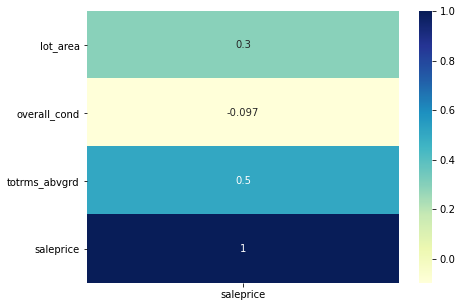

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(naive_df.corr()[['saleprice']], annot=True, cmap='YlGnBu'); 

>create a new dataframe with the square feet, overall quality, total rooms, and sale prices

In [15]:
naive_df1=pd.DataFrame(train,columns=['lot_area',
                                     'overall_qual','totrms_abvgrd','saleprice'])

In [16]:
naive_df1.head()

,lot_area,overall_qual,totrms_abvgrd,saleprice
0,13517,6,6,130500
1,11492,7,8,220000
2,7922,5,5,109000
3,9802,5,7,174000
4,14235,6,6,138500


In [17]:
naive_df1.describe()

,lot_area,overall_qual,totrms_abvgrd,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,6.112140,6.435885,181469.701609
std,6742.488909,1.426271,1.560225,79258.659352
min,1300.000000,1.000000,2.000000,12789.000000
25%,7500.000000,5.000000,5.000000,129825.000000
50%,9430.000000,6.000000,6.000000,162500.000000
75%,11513.500000,7.000000,7.000000,214000.000000
max,159000.000000,10.000000,15.000000,611657.000000


In [18]:
naive_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   lot_area       2051 non-null   int64
 1   overall_qual   2051 non-null   int64
 2   totrms_abvgrd  2051 non-null   int64
 3   saleprice      2051 non-null   int64
dtypes: int64(4)
memory usage: 64.2 KB


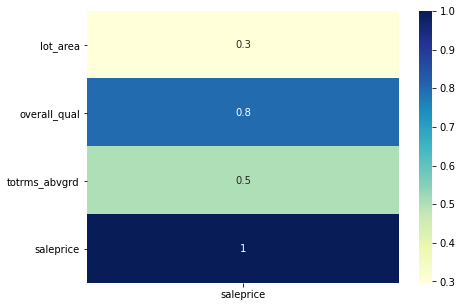

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(naive_df1.corr()[['saleprice']], annot=True, cmap='YlGnBu');

# this looks good, all positive correlated with the sale pricesb

### Square Feet Column

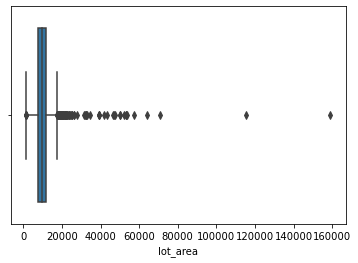

In [20]:
sns.boxplot(x=naive_df1.lot_area); # wow, there some crazy big houses

In [21]:
naive_df1.lot_area.sort_values(ascending=False) # the two outliers are $159000 and $115149

471     159000
694     115149
1854     70761
960      63887
745      57200
         ...  
1447      1484
787       1477
53        1476
1544      1470
1510      1300
Name: lot_area, Length: 2051, dtype: int64

In [22]:
naive_df1.drop([471,694],inplace=True) # deleted the two outliers 

### Overall Quality Column

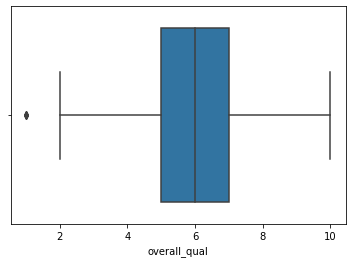

In [23]:
sns.boxplot(x=naive_df1.overall_qual); 

In [24]:
naive_df1.overall_qual.value_counts()

5     563
6     505
7     430
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

### Total Rooms Column

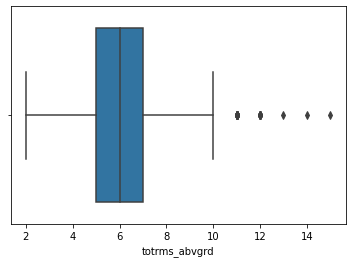

In [25]:
sns.boxplot(x=naive_df1.totrms_abvgrd);

In [26]:
naive_df1.totrms_abvgrd.value_counts()

6     597
7     474
5     406
8     228
4     146
9      98
10     49
11     22
12     13
3      12
2       1
14      1
13      1
15      1
Name: totrms_abvgrd, dtype: int64

In [27]:
total_room_outliers=naive_df1.loc[(naive_df1.totrms_abvgrd==2)|(naive_df1.totrms_abvgrd==14)|
              (naive_df1.totrms_abvgrd==13)|(naive_df1.totrms_abvgrd==15)].index
total_room_outliers
# I am going to delete all 4 of them

Int64Index([858, 1428, 1791, 1885], dtype='int64')

In [28]:
naive_df1.drop(total_room_outliers,inplace=True)

In [29]:
naive_df1.totrms_abvgrd.value_counts()

6     597
7     474
5     406
8     228
4     146
9      98
10     49
11     22
12     13
3      12
Name: totrms_abvgrd, dtype: int64

### final check on the dataframe

In [30]:
naive_df1.shape

(2045, 4)

In [31]:
naive_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   lot_area       2045 non-null   int64
 1   overall_qual   2045 non-null   int64
 2   totrms_abvgrd  2045 non-null   int64
 3   saleprice      2045 non-null   int64
dtypes: int64(4)
memory usage: 79.9 KB


In [32]:
naive_df1.head()

,lot_area,overall_qual,totrms_abvgrd,saleprice
0,13517,6,6,130500
1,11492,7,8,220000
2,7922,5,5,109000
3,9802,5,7,174000
4,14235,6,6,138500


In [33]:
# save to csv
naive_df1.to_csv('../data/naive_model_data.csv',index=False)